# Linear Autoencoder for PCA 

#### We want to create an autoencoder that can correctly separate a dataset of 30 features using only 2 neurons

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

%matplotlib inline

In [6]:
df = pd.read_csv("./anonymized_data.csv")

In [7]:
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


## Scale Data

In [11]:
scaler = MinMaxScaler()

In [12]:
# separate our labels since we don't want to scale them
labels = df['Label']
data = df.drop('Label', 1)

In [13]:
scaled_data = scaler.fit_transform(data)

# TF Graph

## constant and hyperparameters

In [15]:
num_inputs = 30
num_hidden = 2
num_outputs = num_inputs # Must be true for an autoencoder!
learning_rate = 0.001

### Placeholders

In [16]:
with tf.name_scope("Inputs"):
    X = tf.placeholder(tf.float32, shape=[None,num_inputs])

### Variables

In [17]:
with tf.name_scope("Variables"):
    w = tf.Variable(tf.random_uniform([num_inputs, num_hidden],-1, 1))
    b1 = tf.Variable(tf.random_uniform([num_hidden], -1, 1))
    b2 = tf.Variable(tf.random_uniform([num_outputs], -1, 1))

### Layers

In [19]:
with tf.name_scope("hidden_layer"):
    h = tf.add(tf.matmul(X, w), b1)

with tf.name_scope("output"):
    output = tf.add(tf.matmul(h, tf.transpose(w)), b2)

### Loss

In [20]:
with tf.name_scope("Loss"):
    mse = tf.reduce_mean(tf.square(tf.subtract(output, X)))

### Optimizer

In [21]:
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train = optimizer.minimize(mse)

In [22]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

## Training

In [23]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(10000):
        sess.run(train, feed_dict={X:scaled_data})
        
    #saver.save(sess, "./encoder.ckpt")
    
    print("Done training")

Done training


### Encoded features

In [24]:
with tf.Session() as sess:
    #saver.restore(sess, "./encoder.ckpt")
    
    sess.run(init)
    
    # save the two dimensional encoding of our data
    encoded_data = sess.run(h, feed_dict={X:scaled_data})
    

In [17]:
# let's make sure the shape of our data is correct
encoded_data.shape

(500, 2)

## Plot dataset

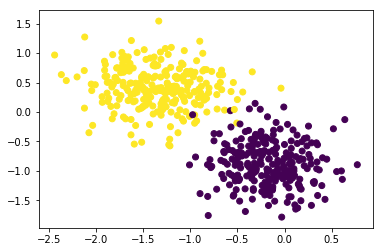

In [25]:
plt.scatter(encoded_data[:,0], encoded_data[:,1], c=df['Label'])

Our encoder did a good job at separating our datasets